This notebook provides an interactive overview to some if the ideas developed in a [paper](http://www.phil.vt.edu/dmayo/personal_website/Error_Statistics_2011.pdf) entitled "Error Statistics", by Mayo and Spanos.

#Goals

For a sample of data:

(1) quantify the extent to which the sample is consistent with coming from a particular, hypothetical data source

(2) if inconsistent, determine what _other_, particular data sources is the sample consistent with.


# Introduction

Two notions of probability:

Frequentist: probabilities represent relative frequency of occurence. 
e.g. $P(X;\mu)$ speaks to the probability of outcome $X$, given $\mu$.

Bayesian: probabilities represent degrees of belief
e.g. $P(\mu;X)$ speaks to the probability of $\mu$ being true, given $X$.

Both are useful. 

Bayesian analyses:
* incorporate prior knowledge
* produce posterior probabilities

Freqentist analyses:
* allow for lack of prior knowledge
* do not produce posterior probabilities


Let's explore the use of frequentist statistics. $P(X;\mu)$ describes a set of probabilities for observed data $X$ given an assumption about the world, parameterized by $\mu$. Specifically, let's look at the statistics of errors of inference.

# Exploration

In [101]:
from scipy.stats import norm # properties of the distribution
from numpy.random import normal # samples from the distribution
import numpy as np
import scipy
from matplotlib import pyplot as plt
%matplotlib inline

All hypotheses discussed herein will be expressed with Gaussian / normal distributions. Let's look at the properties of this distribution.

Start by plotting it. We'll set the mean to 0 and the width the 1...the _standard normal_ distribution.

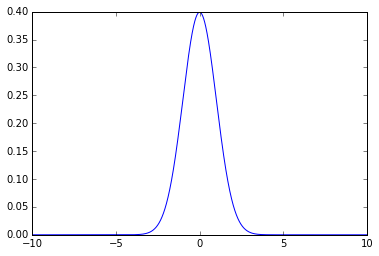

In [102]:
x = np.arange(-10, 10, 0.001)
plt.plot(x,norm.pdf(x,0,1)) # final arguments are mean and width

Now look at the cumulative distribution function of the standard normal, which integrates from negative infinity up to the function argument, on a unit-normalized distribution.

In [103]:
norm.cdf(0)

0.5

The function also accepts a list.

In [104]:
norm.cdf([-1., 0, 1])

array([ 0.15865525,  0.5       ,  0.84134475])

Now let's be more explicit about the parameters of the distribution.

In [105]:
mu = 0
sigma = 1
norm(loc=mu, scale=sigma)
norm.cdf([-1., 0, 1])

array([ 0.15865525,  0.5       ,  0.84134475])

In [106]:
sigma=2
mu = 0
n = norm(loc=mu, scale=sigma)
n.cdf([-1., 0, 1])

array([ 0.30853754,  0.5       ,  0.69146246])

In addition to exploring properties of the exact function, we can sample points from it.

In [107]:
[normal() for _ in range(5)]

[-1.5271579459717446,
 -0.6710569204976888,
 0.8296452042900382,
 0.4540977505596914,
 -1.1165663246947464]

We can also approximate the exact distribution by sampling a large number of points from it.

(-10, 10)

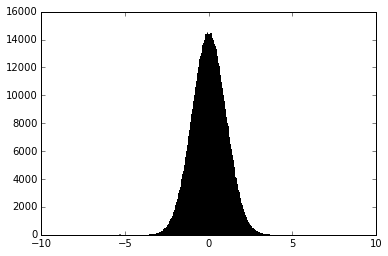

In [110]:
size = 1000000
num_bins = 300

plt.hist([normal() for _ in range(size)],num_bins)
plt.xlim([-10,10])


# Data samples

If we have sample of points, we can summarize them in a model-nonspecific way by calculating the mean.

Here, we draw them from a Gaussian for convenience.

In [114]:
n = 10
my_sample = [normal() for _ in range(n)]
my_sample_mean = np.mean(my_sample)
print(my_sample_mean)

-0.0345079428387


Now let's generate a large number of data samples and plot the corresponding distribution of sample means.

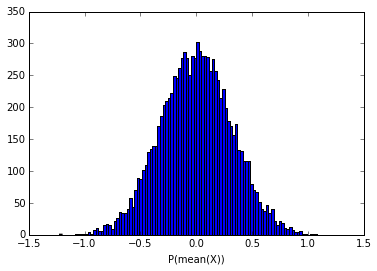

In [115]:
n = 10
means_10 = []
for _ in range(10000):
    my_sample = [normal() for _ in range(n)]
    my_sample_mean = np.mean(my_sample)
    means_10.append(my_sample_mean)

    
plt.hist(means_10,100)
plt.xlim([-1.5,1.5])
plt.xlabel("P(mean(X))")
plt.show()

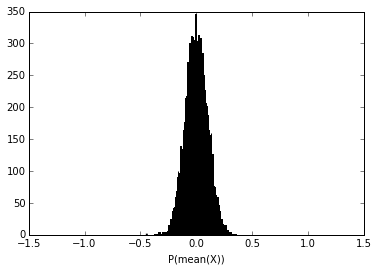

In [116]:
n = 100
means_100 = []
for _ in range(10000):
    my_sample = [normal() for _ in range(n)]
    my_sample_mean = np.mean(my_sample)
    means_100.append(my_sample_mean)
    
plt.hist(means_100,100)
plt.xlim([-1.5,1.5])
plt.xlabel("P(mean(X))")
plt.show()

Note that by increasing the number of data points, the variation on the mean decreases.


Notation: the variable containing all possible n-sized sets of samples is called $X$. A specific $X$, like the one actually observed in an experiment, is called $X_0$. 

## What can we say about the data?

* are the data consistent with having been sampled from a certain distribution?
* if not, what distribution _are_ they consistent with?

# Hypotheses

In our tutorial, a hypothesis is expressed as a distribution from which the data may have been drawn. Our goal is to provide a procedure for rejection of the null hypothesis, and, in the case of rejecting the null, provide warranted inference of one or more alternate hypotheses.

**Simplification**: the hypothesis space is defined as all normal distributions with variable mean $\mu$ and fixed variance. Generalizing this assumption changes almost nothing.

**Corollary**: the hypothesis space is one-dimensional, and the logical _not_ of a hypothesis is simple to comprehend.

## A Test Statistic

To relate observed data to hypotheses, we need to define a _test statistic_, which summarizes a particular experimental result. This statistic is also a function of the hypothesis, and will have different sampling distributions under different hypotheses.

$d(X;H_\mu) = (\bar X - \mu)/(\sigma/\sqrt n)$,

where $\bar X$ is the mean of $X$. For Gaussian hypotheses, $d$ is distributed as a unit normal. 


In [117]:
def d(X=[0], mu = 0, sigma = 1):
    X_bar = np.mean(X)
    return (X_bar - mu) / sigma * np.sqrt(len(X))

In [137]:
n = 10
my_sample = [normal() for _ in range(n)]
d(my_sample)

-0.3521267999709502

Let's numerically determine the sampling distribution under the hypothesis: $H_0$: $\mu = 0, \sigma = 1$

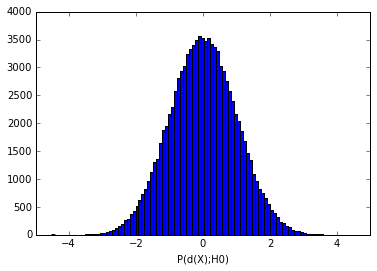

In [138]:
size = 100000
n = 10
d_sample = []

for _ in range(size):
    my_sample = [normal() for _ in range(n)] # get a sample of size n
    d_sample.append(d(my_sample)) # add test statistic for this sample to the list
plt.hist(d_sample,100)
plt.xlabel("P(d(X);H0)")


With this sampling distribution (which can be calculated exactly), we know exectly how likely a particular result $d(X_0)$ is. We also know how likely it is to observe a result that is even less probable than $d(X_0)$,  $P(d(X) > d(X_0); \mu)$.

## Rejecting the null

This probability is the famous `p-value`. When the `p-value` for a particular experimental outcome is less that some pre-determined amount (usually called $\alpha$), we can:

* infer that $H_0$ is falsified at level $\alpha$
* take the action that has been specified for this situation
* infer that $X_0$ indicates something about an alternate hypothesis. If $H_0$ corresponds to $\mu = \mu_0$, then we infer that $\mu > \mu_0 + \delta$.

If $H_0$ is rejected, we can now also begin to speak about statistical properties of $H_1$ where $H_1 != H_0$.

## Neyman-Pearson digression

The traditional frequentist procedure (due to Neyman and Pearson) is to construct a test that fixes the probability of rejecting $H_0$ when it’s true, and maximizes the _power_: the probability of statistical similarity with $H_1$ when it is true. In other words, for a fixed probability of rejecting $H_0$ when it's true, maximize the probability of accepting $H_1$ when it's true.

![Alt text](error.jpg)

The N-P construction is fixed before $X_0$ is observed. We wish to extend this and, when $H_0$ is rejected, infer regions of alternate parameter space that are _severely tested_ by the outcome $X_0$.

## Inference of an alternate hypothesis

When the null hypothesis is rejected, we are interested in _ranges_ of alternate hypotheses that, if _not_ true, are highly likely to have produced a test statistic less significant than $d(X_0)$. We say these ranges of parameters space, which can be thought of as composite hypotheses, have been _severely_ tested. We call the level of testing _severity_ and it is a function of the observed data ($X_0$), the range of alternate hypothesis ($H$), and the test constuction itself.

**This is the point of the tutorial**: we are warrented to infer ranges of hypothesis space when that range has been severely tested.

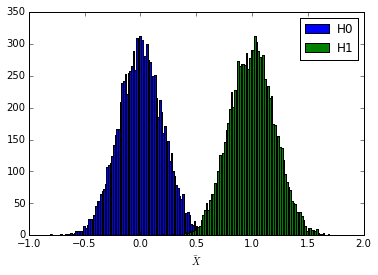

In [161]:
# look at the distributions of sample means for two hypotheses

num_samples = 10000
n = 100

#d0_sample = []
#d1_sample = []

m0_sample = []
m1_sample = []

mu0 = 0
mu1 = 1
sigma=2

for _ in range(num_samples):
    H0_sample = [normal(loc=mu0,scale=sigma) for _ in range(n)] # get a sample of size n from H0
    H1_sample = [normal(loc=mu1,scale=sigma) for _ in range(n)] # get a sample of size n from H1

    m0_sample.append( np.mean(H0_sample) ) # add mean for this sample to the m0 list
    m1_sample.append( np.mean(H1_sample) ) # add mean for this sample to the m1 list
    
    # remember that the test statistic is unit-normal-distributed for Gaussian hypotheses,
    # so these distributions should be identical
    #d0_sample.append( d(H0_sample,mu0,sigma) ) # add test statistic for this sample to the d0 list
    #d1_sample.append( d(H1_sample,mu1,sigma) ) # add test statistic for this sample to the d1 list
    
plt.hist(m0_sample,100,label="H0")
plt.hist(m1_sample,100,label="H1")
plt.xlabel(r"$\bar{X}$")
plt.legend()


Now, imagine that we observe $\bar X_0 = 0.4$. The probability of $\bar X > 0.4$ is less than $2\%$ under $H_0$, so let's say we've rejected $H_0$.

Question, what regions of $\mu$ (defined as $\mu > \mu_1$) have been severely tested?

$SEV(\mu>\mu_1) = P(d(X)<d(X_0);!(\mu>\mu_1))$

In [20]:
# severity for the interval: mu > mu_1
sigma = 2

# note that we calculate the probability in terms of the _lower bound_ of the interval, 
# since it will provide the _lowest_ severity

def severity(mu_1=0, x=[0], mu0=0, sigma=sigma, n=100):
    # find the mean of the observed data
    x_bar = np.mean(x)
    # calculate the test statistic w.r.t the 
    dx = (x_bar - mu_1)/sigma*np.sqrt(n)
    n = norm()
    return n.cdf(dx)

Calculate the severity of an outcome that is rather unlike (is lower) than the lower bound of a range of alternate hypotheses ($\mu > \mu_1$).

In [21]:
severity(mu_1=0.2,x=[0.4],sigma=sigma)

0.84134474606854293

Calculate the severity for a set of observations.

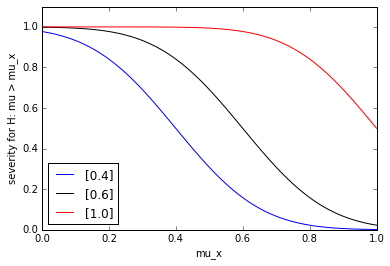

In [22]:
x_bar_values = [[0.4],[0.6],[1.]]
color_indices = ["b","k","r"]

for x,color_idx in zip(x_bar_values,color_indices):
    mu_values = scipy.linspace(0,1,100)
    sev = [severity(mu_1=mu,x=x,sigma=sigma) for mu in mu_values]
    plt.plot(mu_values,sev,color_idx,label=x)
    plt.ylim(0,1.1)
    plt.ylabel("severity for H: mu > mu_x")
    plt.legend(loc="lower left")
    plt.xlabel("mu_x")

Consider some test points:

* given the interval $\mu > \mu_x = 0.4$, the probability to observe something less than or equal to $0.4$ (blue line) is $0.5$.
* warrented intervals of inference are dependant on the observed outcome ($\bar X$ values).